In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import json
from collections import Counter

In [61]:
with open('data/neurips2020.json') as fp:
    paper_set = json.load(fp)

In [62]:
words = []
skip_ins = ['university', 'of', 'research', 'institute', 'technology', 'ai', 'the', 'corporation', 'science', 'and', 'lab', 'college',
            '-', 'state', 'for', 'lab', 'state', 'new', 'center', 'université', 'de', 'group', 'in', 'South', 'san', 'school', 'mellon', 'at', 'labs', 'johns']
for title in paper_set:
    for author in paper_set[title]['authors']:
        institutes = author[1]
        for ins in institutes:
            for word in ins.split():
                if word.lower() in skip_ins:
                    continue
                words.append(word)
            
keyword_counter = Counter(words)
num_keyowrd = 120
keywords_counter_vis = keyword_counter.most_common(num_keyowrd)
# keywords_counter_vis

In [63]:
words = [e[0] for e in keywords_counter_vis]
lower = [e[0].lower() for e in keywords_counter_vis]
# dict(zip(lower, words))

In [64]:

# hard to list full name
famous_institute = {'google': 'Google',
 'stanford': 'Stanford',
 'carnegie': 'CMU',
 'microsoft': 'Microsoft',
 'mit': 'MIT',
 'deepmind': 'DeepMind',
 'berkeley': 'UC, Berkeley',
 'columbia': 'Columbia',
 'facebook': 'Facebook',
 'oxford': 'Oxford',
 'tsinghua': 'Tsinghua',
 'princeton': 'Princeton',
 'georgia tech': 'Georgia Tech',
 'ibm': 'IBM',
 'cornell': 'Cornell',
 'massachusetts institute of technology': 'MIT',
 'peking': 'Peking',
 'austin': 'Austin',
 'eth': 'ETH',
 'chinese academy': 'Chinese Academy',
 'ucla': 'UCLA',
 'duke': 'Duke',
 'illinois': 'UIUC',
 'zurich': 'Zurich',
 'epfl': 'EPFL',
 'harvard': 'Harvard',
 'cambridge': 'Cambridge',
 'new york': 'NYU',
 'urbana-champaign': 'UIUC',
 'riken': 'RIKEN',
 'singapore': 'Singapore',
 'amazon': 'Amazon',
 'tencent': 'Tencent',
 'amherst': 'UM, Amherst',
 'mila': 'MILA',
 'cmu': 'CMU',
 'montreal': 'Montreal',
 'intel': 'Intel',
 'nvidia': 'NVIDIA',
 'alibaba': 'Alibaba',
 'weizmann': 'Weizmann',
 'imperial': 'Imperial',
 'purdue': 'Purdue',
 'los san': 'Los Angeles',
 'rutgers': 'Rutgers',
 'uber': 'Uber',
 'a&m': 'TAMU',
 'nyu': 'NYU',
 'ucl': 'UCL',
 'hopkins': 'Johns Hopkins',
 'chicago': 'Chicago',
 'edinburgh': 'Edinburgh',
 'rice': 'Rice',
 'nanjing': 'Nanjing',
 'yale': 'Yale',
 'caltech': 'Caltech'}

In [65]:
# all_institutes = []

# for title in paper_set:
#     for author in paper_set[title]['authors']:
#         institutes = author[1]
#         for ins in institutes:
#             for famous_ins in famous_institute:
#                 if famous_ins in ins.lower():
#                     all_institutes.append(famous_institute[famous_ins])

# all_institutes_count = Counter(all_institutes)

In [66]:
set_institutes = {}

for title in paper_set:
    set_institutes[title] = []
    for author in paper_set[title]['authors']:
        institutes = author[1]
        
        for ins in institutes:
            for famous_ins in famous_institute:
                
                if famous_ins in ins.lower():
                    if famous_institute[famous_ins] in set_institutes[title]:
                        continue
                    else:
                        set_institutes[title].append(famous_institute[famous_ins])
                
all_inst = []
for key, value in set_institutes.items():
    for val in value:
        all_inst.append(val)
all_institutes_count = Counter(all_inst)
# print(all_inst)

In [67]:
set_authors = {}

for title in paper_set:
    set_authors[title] = []
    for author in paper_set[title]['authors']:
        auth = author[0]
        if auth in set_authors[title]:
            continue
        else:
            set_authors[title].append(auth)
                
all_autho = []
for key, value in set_authors.items():
    for val in value:
        all_autho.append(val)
all_authors_count = Counter(all_autho)

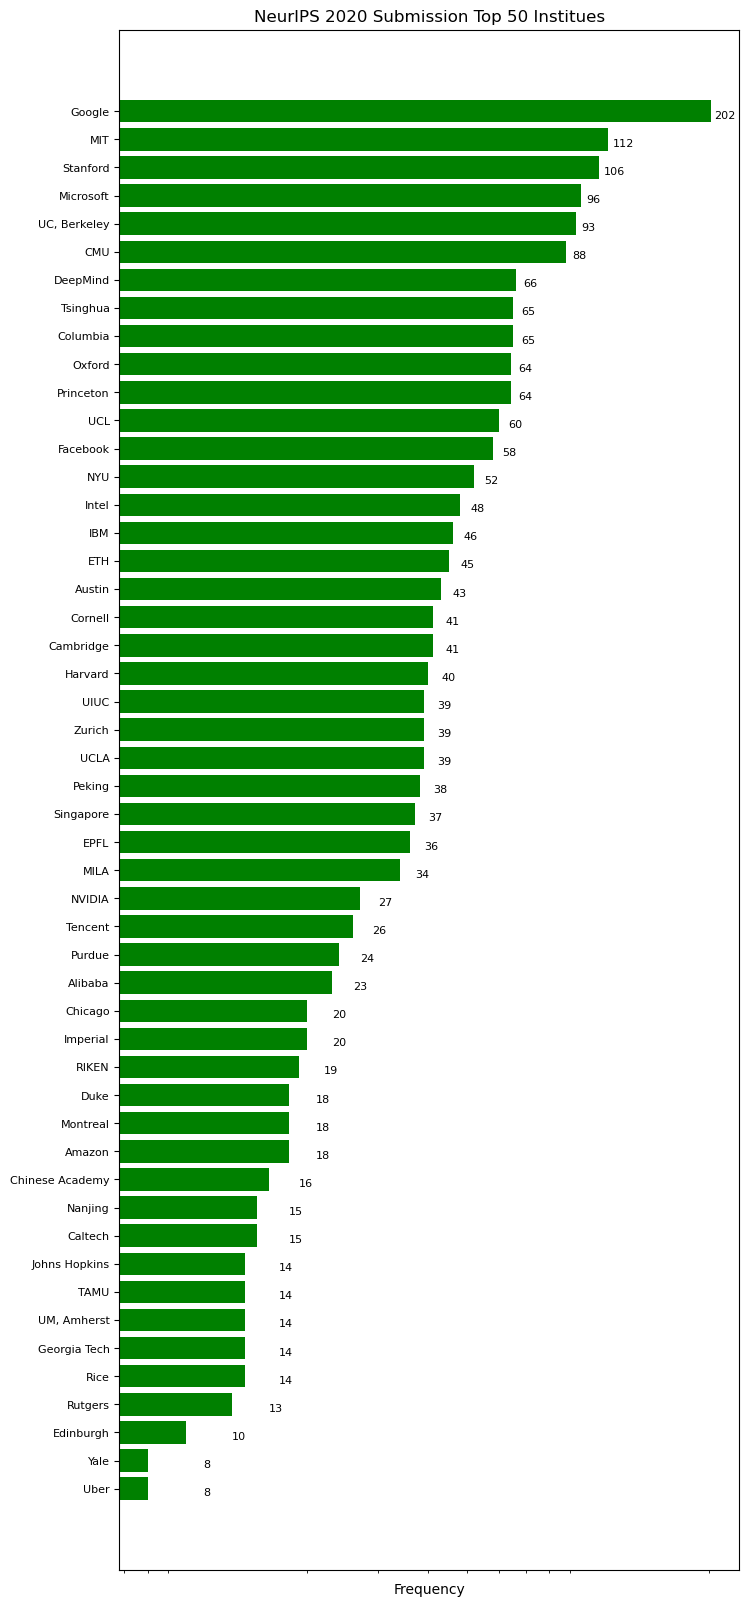

In [68]:
# Show N most common keywords and their frequencies
num_keyowrd = 50
all_institutes_count_vis = all_institutes_count.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 20))

key = [k[0] for k in all_institutes_count_vis] 
value = [k[1] for k in all_institutes_count_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=8)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=8)

ax.set_xlabel('Frequency')
ax.set_title('NeurIPS 2020 Submission Top {} Institues'.format(num_keyowrd))
ax.set_xticks([])
plt.show()
#



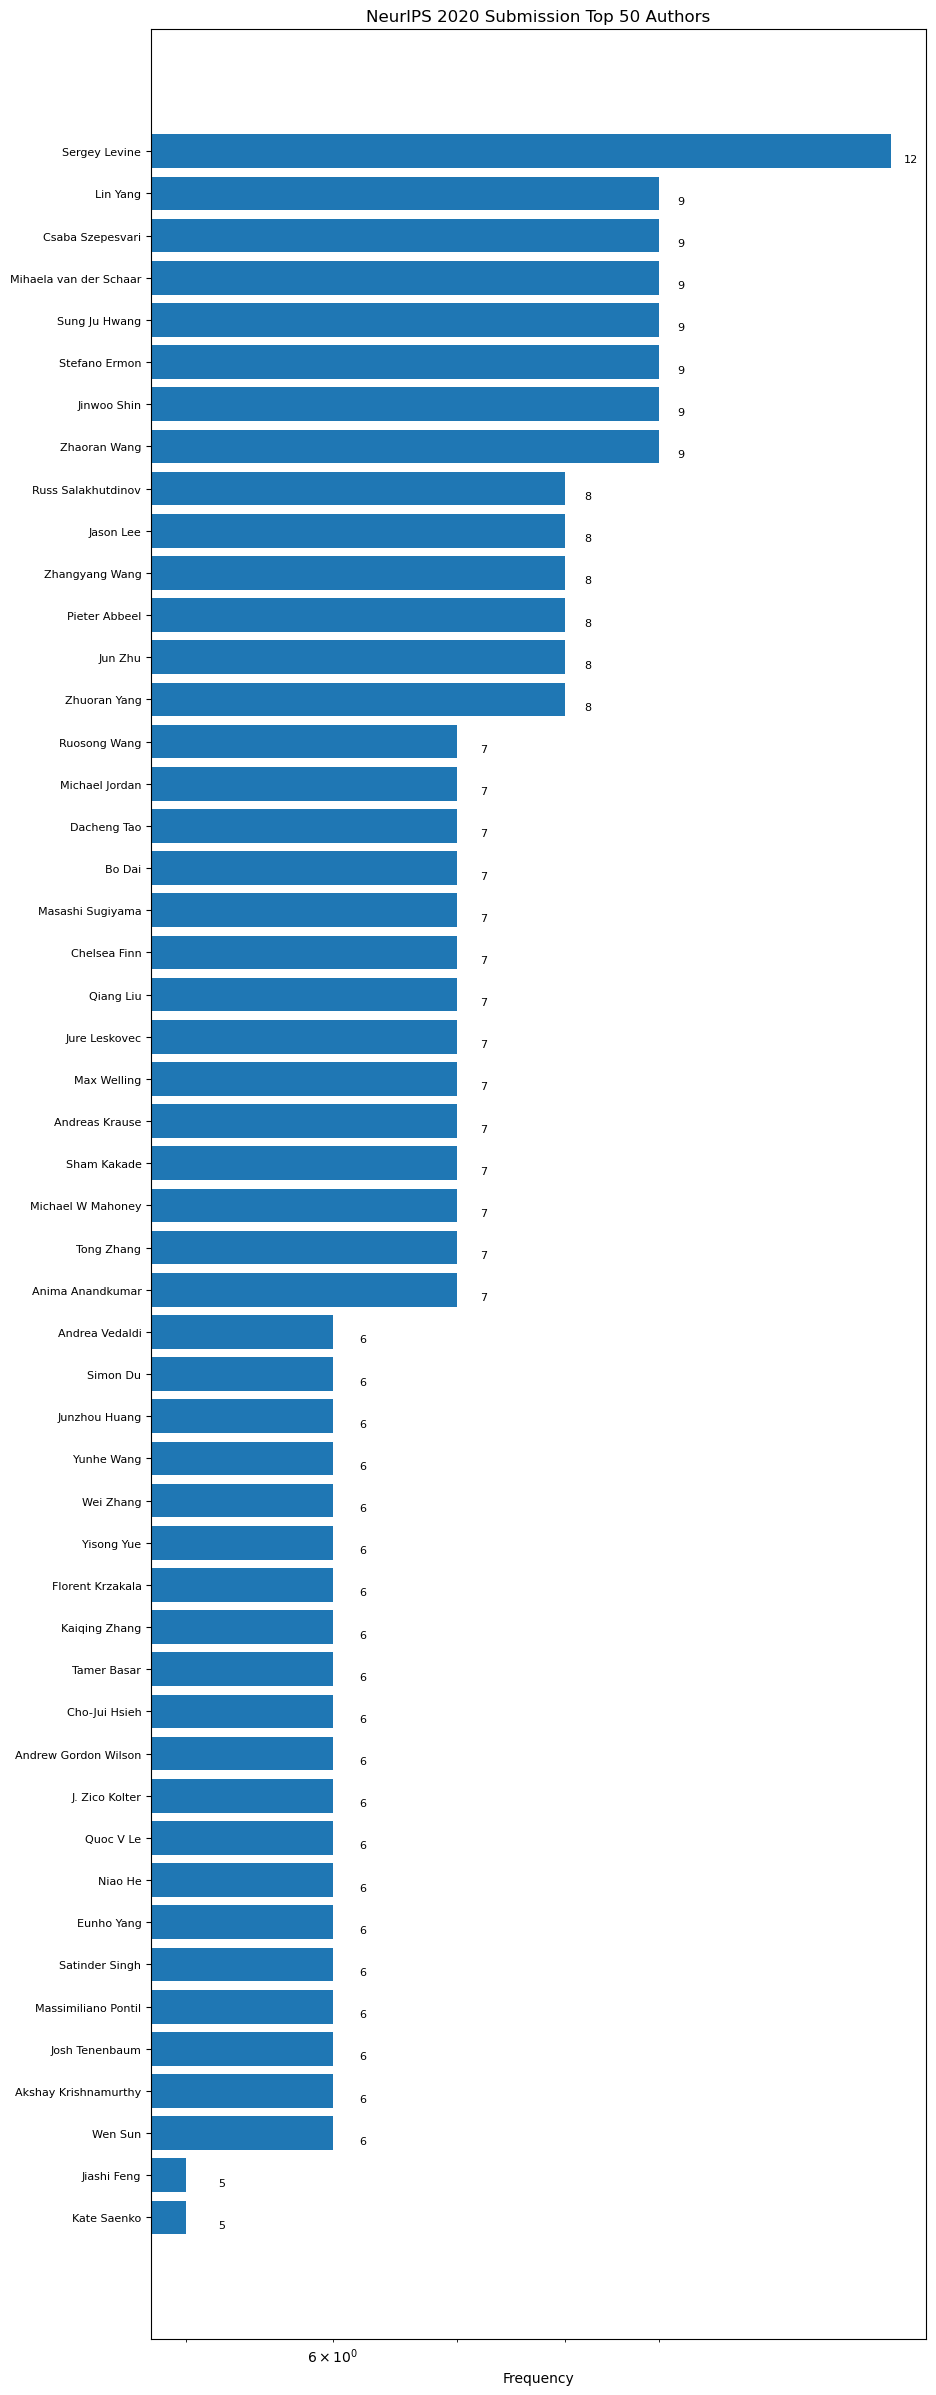

In [69]:
#==============================================================================
# Show N most common keywords and their frequencies
num_keyowrd = 50
all_authors_count_vis = all_authors_count.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10, 30))

key = [k[0] for k in all_authors_count_vis] 
value = [k[1] for k in all_authors_count_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='tab:blue', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=8)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 0.2, i + .25, str(v), color='black', fontsize=8)

ax.set_xlabel('Frequency')
ax.set_title('NeurIPS 2020 Submission Top {} Authors'.format(num_keyowrd))
ax.set_xticks([])
plt.show()

In [70]:
first_institutes = []
for title in paper_set:
    author = paper_set[title]['authors'][0]
    institutes = author[1]
    for ins in institutes:
        for famous_ins in famous_institute:
            if famous_ins in ins.lower():
                first_institutes.append(famous_institute[famous_ins])

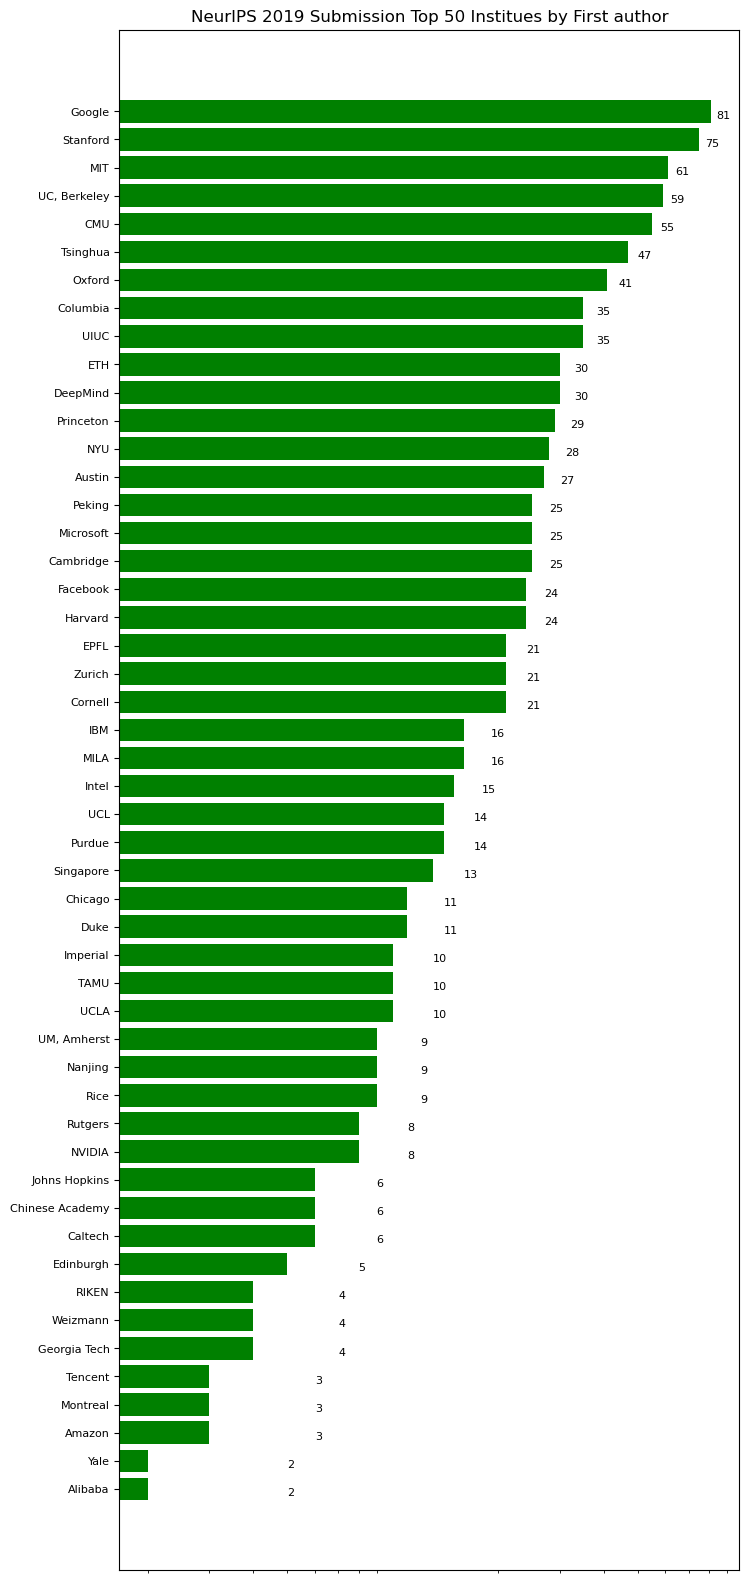

In [71]:
first_institutes = Counter(first_institutes)

# Show N most common keywords and their frequencies
num_keyowrd = 50
first_institutes_vis = first_institutes.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 20))

key = [k[0] for k in first_institutes_vis] 
value = [k[1] for k in first_institutes_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=8)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=8)
ax.set_title('NeurIPS 2019 Submission Top {} Institues by First author'.format(num_keyowrd))
ax.set_xticks([])
plt.show()